## This code snippet demonstrates the usage of Pandas, Matplotlib, and Seaborn libraries for data analysis and visualization.

### Required Packages:
- pandas: a powerful data manipulation and analysis library
- matplotlib: a plotting library for creating static, animated, and interactive visualizations
- seaborn: a data visualization library built on top of Matplotlib, providing high-level interface for drawing attractive and informative statistical graphics
- numpy: a fundamental package for scientific computing with Python, providing support for large, multi-dimensional arrays and matrices, along with a large collection of mathematical functions to operate on these arrays

### Usage:
1. Import the necessary libraries: pandas, matplotlib, seaborn and numpy.
2. Load the data into a Pandas DataFrame using pd.read_csv(), pd.read_excel(), or any other applicable method.
3. Utilize numpy functions and operations for numerical computations on arrays.
4. Perform data analysis and manipulation using Pandas functions and methods.
5. Create visualizations using Matplotlib and Seaborn functions.
6. Customize the plots as needed using the available options and parameters.
7. Display the plots using plt.show().

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### The data from the "Login_Data.csv" file is read and stored in a pandas DataFrame object named 'df'.

The pd.read_csv() function is called with the file path ./Login_Data.csv as an argument. The function reads the CSV file and converts it into a pandas DataFrame. The resulting DataFrame is then assigned to the variable df.

The purpose of this code is to load the data from the CSV file into a DataFrame for further data manipulation, analysis, or processing using pandas.

In [2]:
df = pd.read_csv("Login_Data.csv")

#### The head() method is commonly used in data analysis and exploratory data analysis (EDA) tasks to obtain an overview of the data before performing further analysis or processing. It is particularly useful when dealing with large datasets, as it provides a concise summary of the DataFrame content.

In [3]:
df.head()

,Login Timestamp,User ID,IP Address,Country,Region,City,Browser Name and Version,Device Type,Login Successful
0,2020-02-03 12:43:30.772,-4324475583306591935,10.0.65.171,NO,-,-,Firefox 20.0.0.1618,mobile,False
1,2020-02-03 12:43:43.549,-4324475583306591935,194.87.207.6,AU,-,-,Chrome Mobile 46.0.2490,mobile,False
2,2020-02-03 12:43:55.873,-3284137479262433373,81.167.144.58,NO,Vestland,Urangsvag,Android 2.3.3.2672,mobile,True
3,2020-02-03 12:43:56.180,-4324475583306591935,170.39.78.152,US,-,-,Chrome Mobile WebView 85.0.4183,mobile,False
4,2020-02-03 12:43:59.396,-4618854071942621186,10.0.0.47,US,Virginia,Ashburn,Chrome Mobile WebView 85.0.4183,mobile,False


In [4]:
df.describe()

,User ID
count,3.126926e+07
mean,-1.924043e+18
std,4.514276e+18
min,-9.223371e+18
25%,-4.324476e+18
50%,-4.324476e+18
75%,9.119813e+17
max,9.223359e+18


#### This code snippet provides a visual representation of the top 10 users with the highest number of login attempts. It helps in identifying the most active users based on login activity.

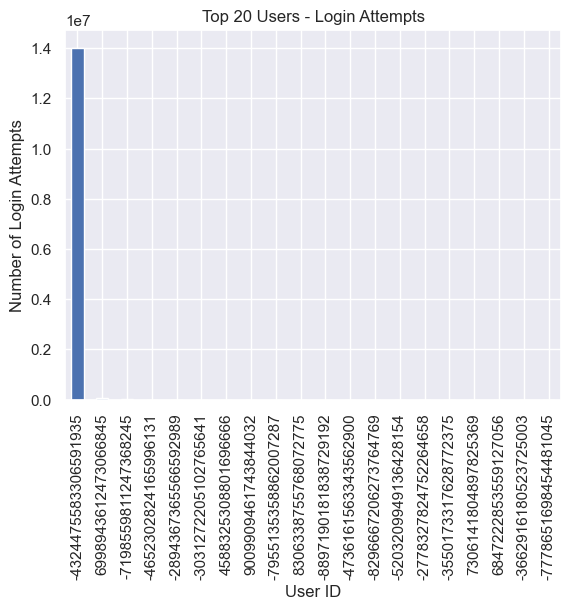

In [5]:
login_attempts = df['User ID'].value_counts()
top_10_users = login_attempts.head(20)
sns.set(style='darkgrid')
top_10_users.plot(kind='bar')

plt.xlabel('User ID')
plt.ylabel('Number of Login Attempts')
plt.title('Top 20 Users - Login Attempts')
plt.show()


### We have identified a user with the ID "-4324475583306591935" who has an exceptionally high number of logins. In order to investigate this user further, we have conducted a comprehensive Exploratory Data Analysis (EDA) specifically focused on this user. 

## The detailed analysis and findings can be found in the file named "outlier_user.ipynb".

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31269264 entries, 0 to 31269263
Data columns (total 9 columns):
 #   Column                    Dtype 
---  ------                    ----- 
 0   Login Timestamp           object
 1   User ID                   int64 
 2   IP Address                object
 3   Country                   object
 4   Region                    object
 5   City                      object
 6   Browser Name and Version  object
 7   Device Type               object
 8   Login Successful          bool  
dtypes: bool(1), int64(1), object(7)
memory usage: 1.9+ GB


### The following code snippet is utilized to remove a specific user from the dataset, which results in improving the quality of the data for anomaly detection purposes. By eliminating this user, the dataset becomes more suitable for accurately identifying and analyzing anomalies.

In [7]:
# Find the user with the highest login frequency
top_user_id = df['User ID'].value_counts().idxmax()

# Remove all rows associated with the top user
df.drop(df[df['User ID'] == top_user_id].index, inplace=True)

# Verify the removal
unique_users = df['User ID'].nunique()
print("Number of unique users after removal:", unique_users)

Number of unique users after removal: 4304856


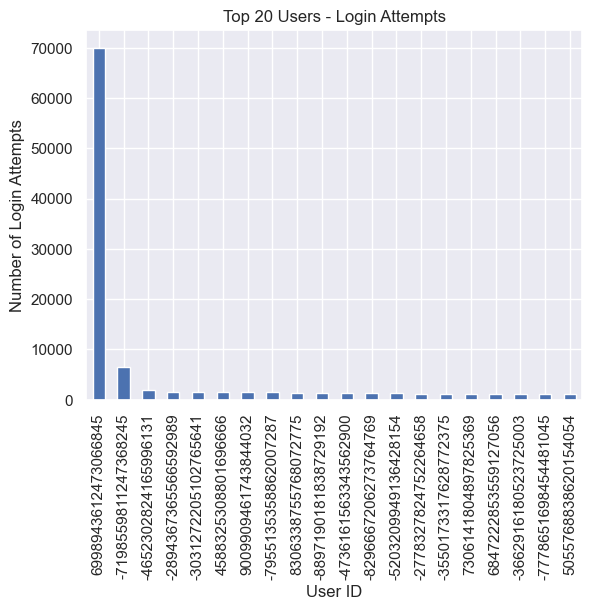

In [8]:
login_attempts = df['User ID'].value_counts()
top_10_users = login_attempts.head(20)
sns.set(style='darkgrid')
top_10_users.plot(kind='bar')

plt.xlabel('User ID')
plt.ylabel('Number of Login Attempts')
plt.title('Top 20 Users - Login Attempts')
plt.show()


In [9]:
# User activity analysis
unique_users = df['User ID'].nunique()
print("Number of unique users:", unique_users)

top_users = df['User ID'].value_counts().head(10)
print("Top 5 users by login frequency:")
print(top_users)

Number of unique users: 4304856
Top 5 users by login frequency:
 6998943612473066845    70028
-7198559811247368245     6417
-4652302824165996131     1927
-2894367365566592989     1613
-3031272205102765641     1537
 4588325308801696666     1510
 9009909461743844032     1475
-7955135358862007287     1423
 8306338755768072775     1367
-8897190181838729192     1319
Name: User ID, dtype: int64


### The following operation effectively removes the existing index and replaces it with a new index that ensures the rows are ordered sequentially.

By using the drop=True parameter, the old index is discarded and not added as a new column in the DataFrame.

In [10]:
df = df.reset_index(drop=True)

### Knowing the shape of the dataset can assist in understanding the data's extent and potential complexity, aiding in further analysis and decision-making processes.

In [11]:
df.shape

(17243365, 9)

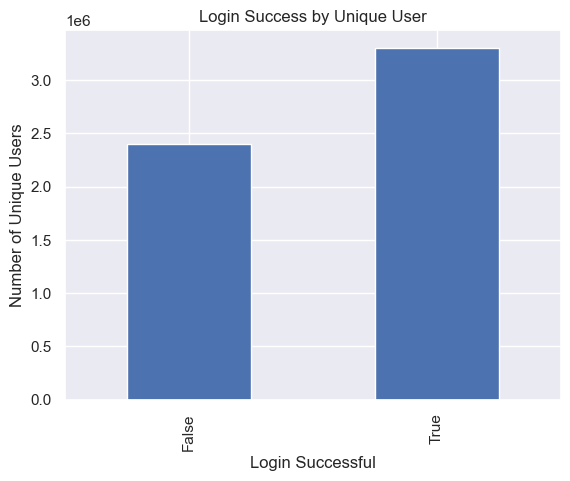

In [31]:
# Group data by User ID and count the number of unique users with True and False values
grouped_data = df.groupby('Login Successful')['User ID'].nunique()

# Plot the bar graph
grouped_data.plot(kind='bar')

# Customize the plot
plt.xlabel('Login Successful')
plt.ylabel('Number of Unique Users')
plt.title('Login Success by Unique User')

# Display the graph
plt.show()

In [12]:
df['Region'].replace('-', 'Unknown', inplace=True)
df['City'].replace('-', 'Unknown', inplace=True)


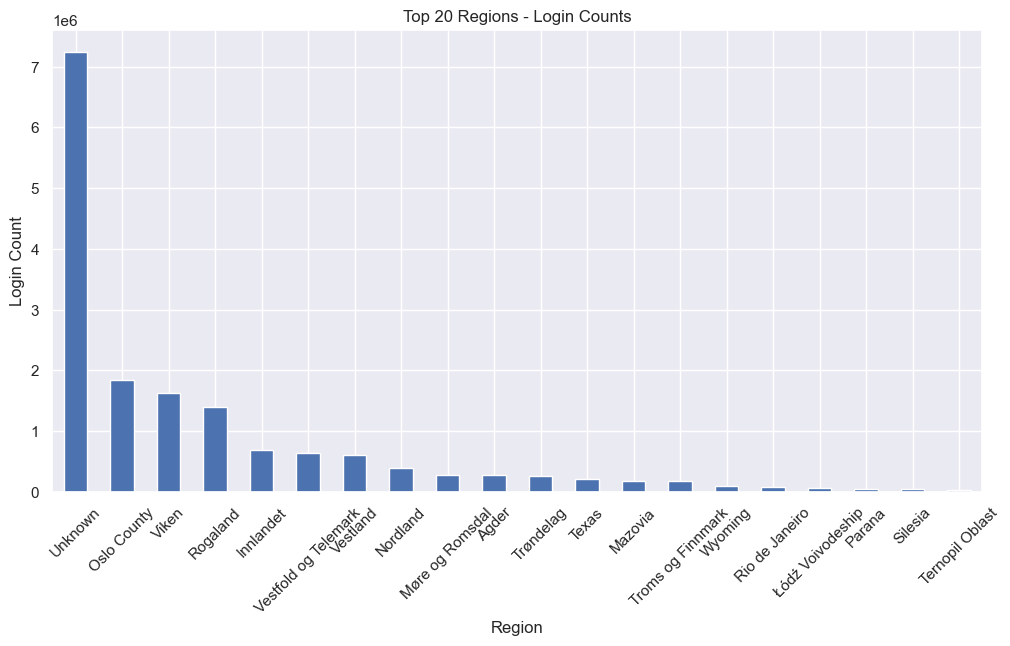

In [13]:
region_counts = df['Region'].value_counts().head(20)

# Create the bar graph
plt.figure(figsize=(12, 6))
region_counts.plot(kind='bar')
plt.title('Top 20 Regions - Login Counts')
plt.xlabel('Region')
plt.ylabel('Login Count')
plt.xticks(rotation=45)
plt.show()

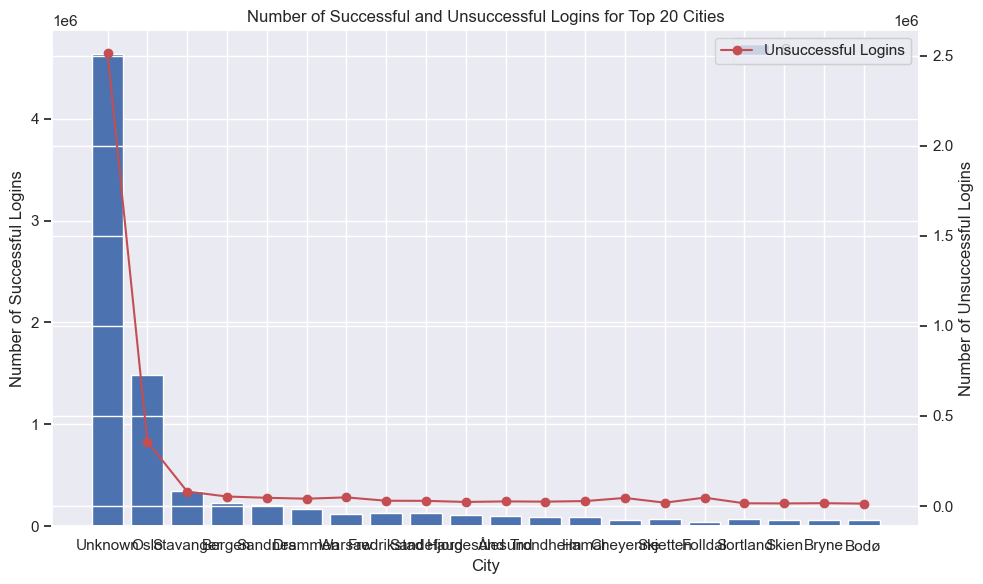

In [14]:
# Group the data by 'City' and calculate the count of successful logins and unsuccessful logins in each city
login_by_city = df.groupby('City')['Login Successful'].value_counts().unstack().fillna(0)

# Calculate the total logins (successful + unsuccessful) for each city
login_by_city['Total'] = login_by_city.sum(axis=1)

# Select the top 20 cities based on the total logins
top_20_cities = login_by_city.nlargest(20, 'Total')

# Plotting the graph
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar graph for successful logins
ax1.bar(top_20_cities.index, top_20_cities[True], color='b', label='Successful Logins')

ax1.set_xlabel('City')
ax1.set_ylabel('Number of Successful Logins')
ax1.set_title('Number of Successful and Unsuccessful Logins for Top 20 Cities')
ax1.legend()

# Create a second y-axis for the line graph
ax2 = ax1.twinx()

# Line graph for unsuccessful logins
ax2.plot(top_20_cities.index, top_20_cities[False], color='r', marker='o', label='Unsuccessful Logins')

ax2.set_ylabel('Number of Unsuccessful Logins')
ax2.legend(loc='upper right')

# Set x-axis tick labels using plt.xticks()
plt.xticks(rotation=90)
plt.xticks(range(len(top_20_cities.index)), top_20_cities.index)

plt.tight_layout()
plt.show()

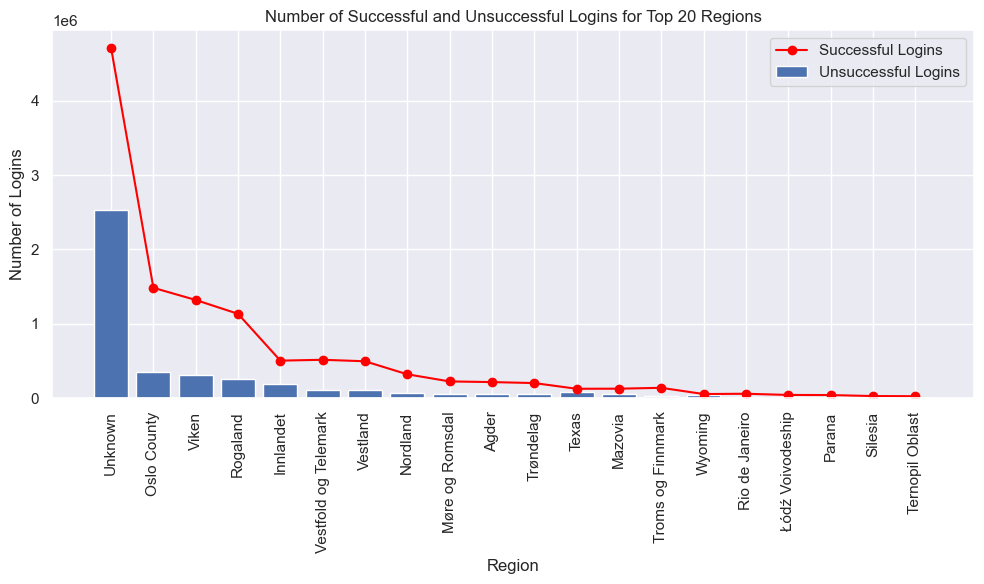

In [15]:
login_by_region = df.groupby('Region')['Login Successful'].value_counts().unstack().fillna(0)

# Calculate the total logins (successful + unsuccessful) for each region
login_by_region['Total'] = login_by_region.sum(axis=1)

# Select the top 20 regions based on the total logins
top_20_regions = login_by_region.nlargest(20, 'Total')

# Plotting the graph
fig, ax = plt.subplots(figsize=(10, 6))

# Line graph for successful logins (color = orange)
ax.plot(top_20_regions.index, top_20_regions[True], marker='o', color='red', label='Successful Logins')

# Bar graph for unsuccessful logins
ax.bar(top_20_regions.index, top_20_regions[False], label='Unsuccessful Logins')

ax.set_xlabel('Region')
ax.set_ylabel('Number of Logins')
ax.set_title('Number of Successful and Unsuccessful Logins for Top 20 Regions')

# Set the x-axis tick positions
ax.set_xticks(range(len(top_20_regions.index)))

# Set the x-axis tick labels
ax.set_xticklabels(top_20_regions.index, rotation=90)

ax.legend()

plt.tight_layout()
plt.show()

### We made the decision to temporarily remove the 'Region' and 'City' columns from our dataset. These columns were taking more time than anticipated to be utilized for exploratory data analysis (EDA). 

To explain our approach, we will utilize Logistic Regression to handle missing values and Regex to correct values that contain unique characters.

In [16]:
df = df.drop(['Region', 'City'], axis=1)
df.head()

,Login Timestamp,User ID,IP Address,Country,Browser Name and Version,Device Type,Login Successful
0,2020-02-03 12:43:55.873,-3284137479262433373,81.167.144.58,NO,Android 2.3.3.2672,mobile,True
1,2020-02-03 12:43:59.396,-4618854071942621186,10.0.0.47,US,Chrome Mobile WebView 85.0.4183,mobile,False
2,2020-02-03 12:44:07.893,7246533443898239661,80.202.228.214,NO,Chrome 69.0.3497.17.19,desktop,True
3,2020-02-03 12:44:12.799,-3243978724802435038,170.39.78.177,US,Chrome Mobile 81.0.4044.1931,mobile,False
4,2020-02-03 12:44:17.474,8076000552587369902,10.0.61.212,NO,MiuiBrowser 12.6.5,mobile,False


### Checking the number of unique values for columns "Country", "Device Type" and "Browser Name and Version"

In [17]:
df.nunique()

Login Timestamp             17243290
User ID                      4304856
IP Address                   2569911
Country                          217
Browser Name and Version        3325
Device Type                        5
Login Successful                   2
dtype: int64

### Removing Version from the column "Browser Name and Version" to scale values and categorize them, and then storing new values in column "Browser Category"

In [18]:
import re
df['Browser Category'] = df['Browser Name and Version'].apply(lambda x: re.search(r'^\D+', x).group() if re.search(r'^\D+', x) else '')
df = df.drop(['Browser Name and Version'], axis=1)

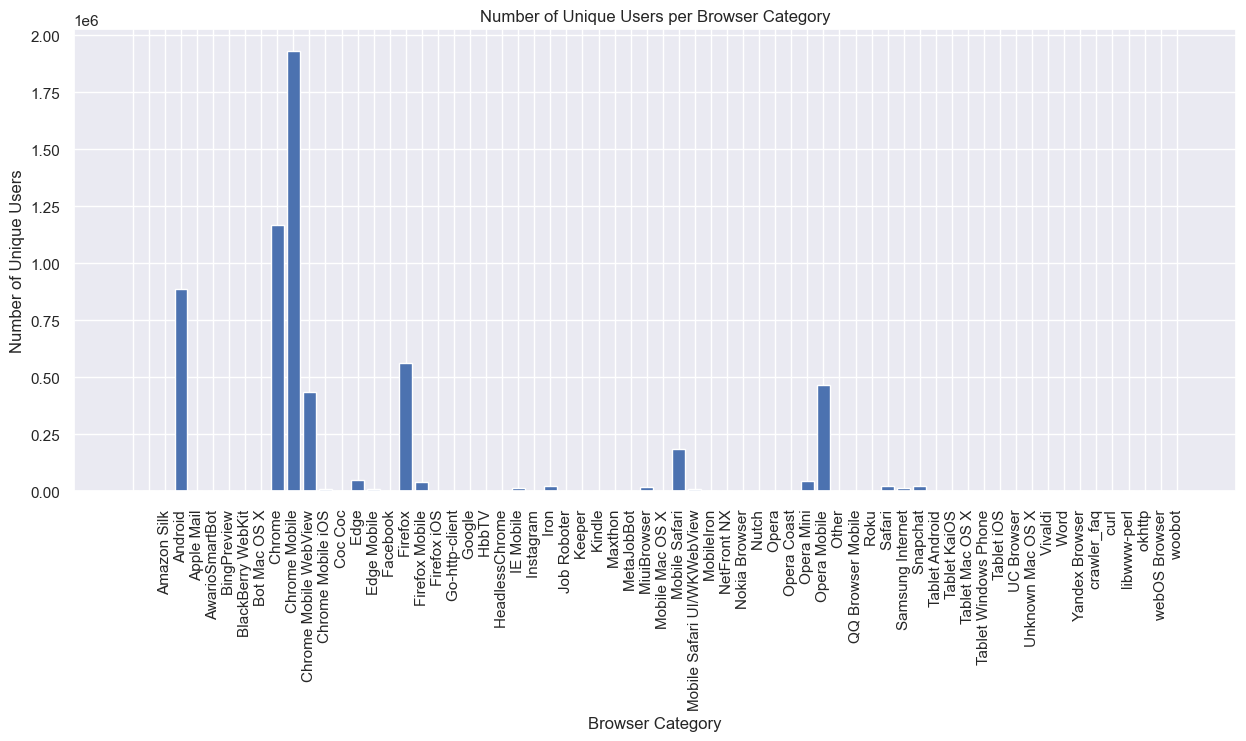

In [19]:
# Count the number of unique users per browser category
unique_users = df.groupby('Browser Category')['User ID'].nunique()

# Increase the figure size
plt.figure(figsize=(15, 6))

# Create a bar graph to visualize the data
plt.bar(unique_users.index, unique_users.values)

# Set the labels and title
plt.xlabel('Browser Category')
plt.ylabel('Number of Unique Users')
plt.title('Number of Unique Users per Browser Category')

# Rotate the x-axis labels if needed
plt.xticks(rotation=90)

# Display the plot
plt.show()

### This code snippet performs the following operations:

1. It creates a list called top_browsers by obtaining the top 22 most common values in the 'Browser Category' column of the DataFrame 'data'.

2. It defines a list called bot_browsers that contains specific browser names associated with bots.

3. It identifies the browser categories in the top_browsers list that contain any of the bot_browsers by performing a case-insensitive search. The identified bot browser categories are stored in the bot_browsers_top list.

4. It removes the bot browser categories from the top_browsers list.

5. It defines a function called categorize_browser that categorizes a given browser based on whether it belongs to the top_browsers, bot_browsers, or other categories.

6. It updates the column called 'Browser Category' in the 'data' DataFrame by applying the categorize_browser function to the values in the 'Browser Category' column.

In [20]:
top_browsers = df['Browser Category'].value_counts().head(22).index.tolist()

# Defining the bot browser categories
bot_browsers = ['bot', ' Bot', 'AwarioSmartBot', 'Bot Mac OS X', 'MetaJobBot', 'libwwwperl',
                'MobileIron', 'Coc Coc', 'woobot', 'crawler_faq', 'Job Roboter',
                'Keeper', 'BingPreview', 'Tablet Mac OS X', 'Nutch', 'curl', 'okhttp', 'Bot']

# Identifing the bot browsers in the top browsers list
bot_browsers_top = [browser for browser in top_browsers if any(bot.lower() in browser.lower() for bot in bot_browsers)]

# Removing the bot browsers from the top browsers list
top_browsers = [browser for browser in top_browsers if browser not in bot_browsers_top]

# Creating a function to categorize the browser
def categorize_browser(browser):
    if browser in top_browsers:
        return browser
    elif any(keyword.lower() in browser.lower() for keyword in bot_browsers):
        return 'Bot'
    else:
        return 'Others'

# Updating the browser category column
df['Browser Category'] = df['Browser Category'].apply(categorize_browser)

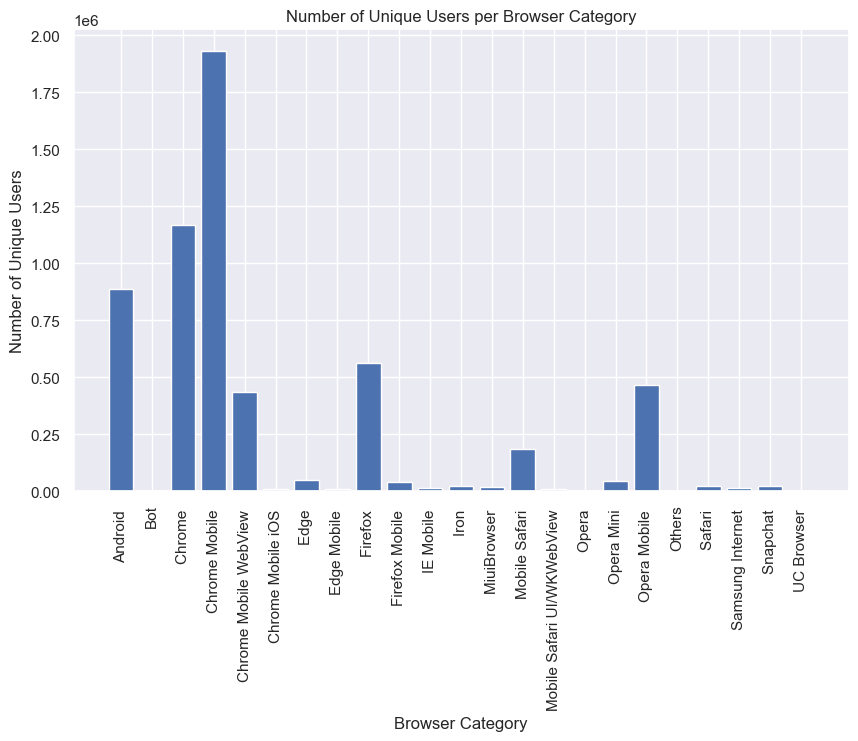

In [21]:
unique_users = df.groupby('Browser Category')['User ID'].nunique()

# Increase the figure size
plt.figure(figsize=(10, 6))

# Create a bar graph to visualize the data
plt.bar(unique_users.index, unique_users.values)

# Set the labels and title
plt.xlabel('Browser Category')
plt.ylabel('Number of Unique Users')
plt.title('Number of Unique Users per Browser Category')

# Rotate the x-axis labels if needed
plt.xticks(rotation=90)

# Display the plot
plt.show()

In [22]:
df.head()

,Login Timestamp,User ID,IP Address,Country,Device Type,Login Successful,Browser Category
0,2020-02-03 12:43:55.873,-3284137479262433373,81.167.144.58,NO,mobile,True,Android
1,2020-02-03 12:43:59.396,-4618854071942621186,10.0.0.47,US,mobile,False,Chrome Mobile WebView
2,2020-02-03 12:44:07.893,7246533443898239661,80.202.228.214,NO,desktop,True,Chrome
3,2020-02-03 12:44:12.799,-3243978724802435038,170.39.78.177,US,mobile,False,Chrome Mobile
4,2020-02-03 12:44:17.474,8076000552587369902,10.0.61.212,NO,mobile,False,MiuiBrowser


In [23]:
top_browsers =df['Browser Category'].value_counts().head(10)

# Print the list of top 10 browsers with the number of users
print("Top 10 Browsers Used by Users:")
for browser, count in top_browsers.items():
    print(f"{count} users - {browser}")

Top 10 Browsers Used by Users:
5195004 users - Chrome Mobile 
5124159 users - Chrome 
2467519 users - Android 
1562710 users - Firefox 
1014283 users - Opera Mobile 
953665 users - Chrome Mobile WebView 
321479 users - Mobile Safari 
125486 users - Edge 
89439 users - Firefox Mobile 
74177 users - Opera Mini 


In [24]:
df["Browser Category"].unique()

array(['Android ', 'Chrome Mobile WebView ', 'Chrome ', 'Chrome Mobile ',
       'MiuiBrowser ', 'Opera ', 'Firefox ', 'Opera Mobile ', 'Snapchat ',
       'Edge ', 'IE Mobile ', 'Opera Mini ', 'Firefox Mobile ', 'Safari ',
       'Mobile Safari UI/WKWebView ', 'Iron ', 'Chrome Mobile iOS ',
       'Edge Mobile ', 'Samsung Internet ', 'Mobile Safari ', 'Others',
       'UC Browser ', 'Bot'], dtype=object)

In [25]:
df.head()

,Login Timestamp,User ID,IP Address,Country,Device Type,Login Successful,Browser Category
0,2020-02-03 12:43:55.873,-3284137479262433373,81.167.144.58,NO,mobile,True,Android
1,2020-02-03 12:43:59.396,-4618854071942621186,10.0.0.47,US,mobile,False,Chrome Mobile WebView
2,2020-02-03 12:44:07.893,7246533443898239661,80.202.228.214,NO,desktop,True,Chrome
3,2020-02-03 12:44:12.799,-3243978724802435038,170.39.78.177,US,mobile,False,Chrome Mobile
4,2020-02-03 12:44:17.474,8076000552587369902,10.0.61.212,NO,mobile,False,MiuiBrowser


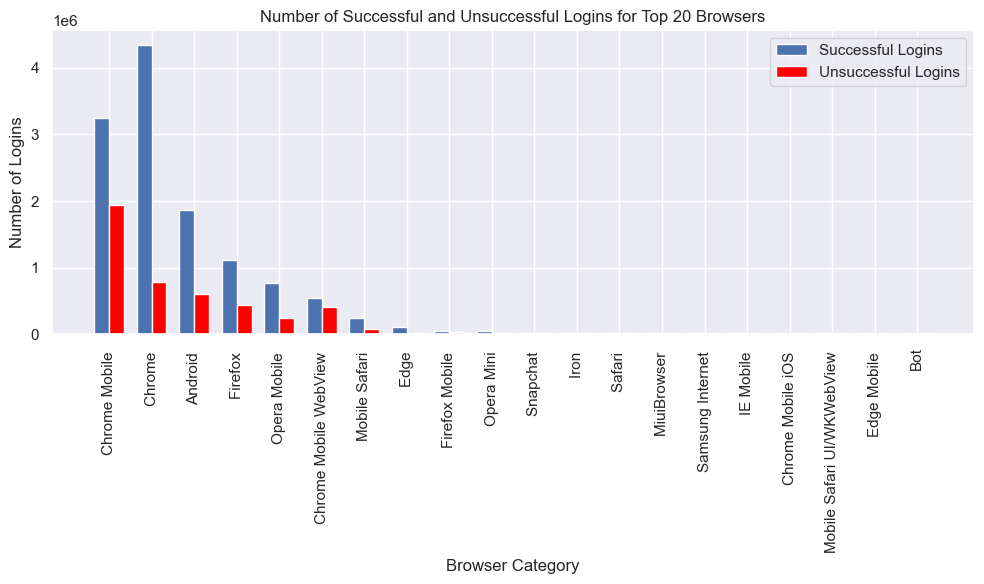

In [26]:
# Calculate the total logins (successful + unsuccessful) for each browser category
grouped_data = df.groupby(['Browser Category', 'Login Successful']).size().unstack(fill_value=0)

# Select the top 20 browser categories based on the total logins
top_20_browser = grouped_data.sum(axis=1).nlargest(20)

# Plotting the graph
fig, ax = plt.subplots(figsize=(10, 6))

# Set the width of each bar
bar_width = 0.35

# Set the positions of the bars on the x-axis
bar_positions = np.arange(len(top_20_browser))

# Bar graph for successful logins (color = green)
ax.bar(bar_positions - bar_width/2, grouped_data.loc[top_20_browser.index, True], width=bar_width, label='Successful Logins')

# Bar graph for unsuccessful logins (color = red)
ax.bar(bar_positions + bar_width/2, grouped_data.loc[top_20_browser.index, False], color='red', width=bar_width, label='Unsuccessful Logins')

ax.set_xlabel('Browser Category')
ax.set_ylabel('Number of Logins')
ax.set_title('Number of Successful and Unsuccessful Logins for Top 20 Browsers')

# Set the x-axis tick positions and labels
ax.set_xticks(bar_positions)
ax.set_xticklabels(top_20_browser.index, rotation=90)

ax.legend()

plt.tight_layout()
plt.show()

### In this code, two new column named 'NumSuccessfulLogins' and 'NumUnuccessfulLogins' are added to the DataFrame df. The values in this column represent the total number of successful logins and total number of unsuccessful logins for each user respectivly.

In [27]:
df['NumSuccessfulLogins'] = df.groupby('User ID')['Login Successful'].transform('sum')

# Grouping the data by "User ID" and count the number of False values in "Login Successful"
false_counts = df[df['Login Successful'] == False].groupby('User ID').size().reset_index(name='NumUnsuccessfulLogins')

# Merging the false_counts DataFrame with the original data
df = df.merge(false_counts, on='User ID', how='left')

# Filling NaN values in the new column with 0
df['NumUnsuccessfulLogins'] = df['NumUnsuccessfulLogins'].fillna(0)

# Converting the values in the "False Count" column to integers
df['NumUnsuccessfulLogins'] = df['NumUnsuccessfulLogins'].astype(int)

In [28]:
df.head()

,Login Timestamp,User ID,IP Address,Country,Device Type,Login Successful,Browser Category,NumSuccessfulLogins,NumUnsuccessfulLogins
0,2020-02-03 12:43:55.873,-3284137479262433373,81.167.144.58,NO,mobile,True,Android,19,1
1,2020-02-03 12:43:59.396,-4618854071942621186,10.0.0.47,US,mobile,False,Chrome Mobile WebView,1,2
2,2020-02-03 12:44:07.893,7246533443898239661,80.202.228.214,NO,desktop,True,Chrome,4,4
3,2020-02-03 12:44:12.799,-3243978724802435038,170.39.78.177,US,mobile,False,Chrome Mobile,2,3
4,2020-02-03 12:44:17.474,8076000552587369902,10.0.61.212,NO,mobile,False,MiuiBrowser,531,4


The code snippet updates the 'Num Successful Logins' column in the DataFrame 'data' by replacing any occurrences of 0 with 1.

In [33]:
df['NumSuccessfulLogins'] = df['NumSuccessfulLogins'].replace(0, 1)

### The code snippet adds a new column called 'LoginRatio' to the DataFrame 'df'. It calculates the ratio of the number of unsuccessful logins to the number of successful logins for each row in the DataFrame. 

The line df['LoginRatio'].replace(np.inf, 0, inplace=True) replaces any infinite values (if any) in the 'LoginRatio' column with 0. This is done to handle cases where the number of successful logins is 0, resulting in division by zero and producing an infinite value. 

In [34]:
df['LoginRatio'] = df['NumUnsuccessfulLogins'] / df['NumSuccessfulLogins']
df['LoginRatio'].replace(np.inf, 0, inplace=True)

Dropping these columns as they are no longer needed.

In [35]:
df = df.drop(['NumSuccessfulLogins', 'NumUnsuccessfulLogins'], axis = 1)

In [36]:
df.head()

,Login Timestamp,User ID,IP Address,Country,Device Type,Login Successful,Browser Category,LoginRatio
0,2020-02-03 12:43:55.873,-3284137479262433373,81.167.144.58,NO,mobile,True,Android,0.052632
1,2020-02-03 12:43:59.396,-4618854071942621186,10.0.0.47,US,mobile,False,Chrome Mobile WebView,2.000000
2,2020-02-03 12:44:07.893,7246533443898239661,80.202.228.214,NO,desktop,True,Chrome,1.000000
3,2020-02-03 12:44:12.799,-3243978724802435038,170.39.78.177,US,mobile,False,Chrome Mobile,1.500000
4,2020-02-03 12:44:17.474,8076000552587369902,10.0.61.212,NO,mobile,False,MiuiBrowser,0.007533


### Checking the coloumn "Device Types" for categorization

In [37]:
df['Device Type'].unique()

array(['mobile', 'desktop', 'tablet', 'unknown', nan, 'bot'], dtype=object)

#### This code snippet replaces missing values with 'unknown', and then further replaces any instances of 'unknown' with 'other' if they were present.

In [38]:
df['Device Type'] = df['Device Type'].fillna('unknown')
df['Device Type'] = df['Device Type'].replace('unknown', 'other')

In [39]:
df['Device Type'].unique()

array(['mobile', 'desktop', 'tablet', 'other', 'bot'], dtype=object)

In [40]:
df.nunique()

Login Timestamp     17243290
User ID              4304856
IP Address           2569911
Country                  217
Device Type                5
Login Successful           2
Browser Category          23
LoginRatio              2863
dtype: int64

In [41]:
df.isnull().sum()

Login Timestamp     0
User ID             0
IP Address          0
Country             0
Device Type         0
Login Successful    0
Browser Category    0
LoginRatio          0
dtype: int64

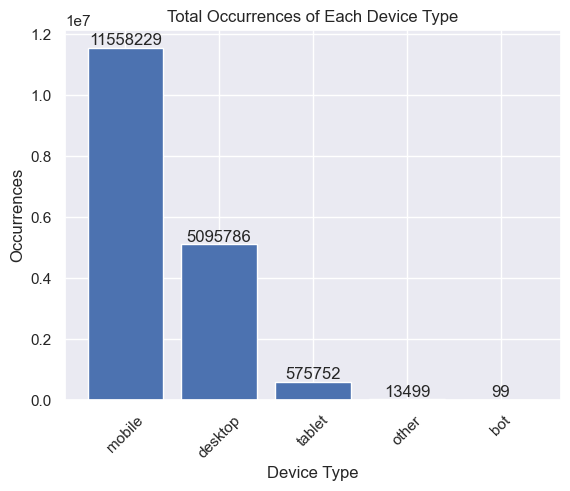

In [54]:
# Count the occurrences of each device type
device_counts = df['Device Type'].value_counts()

# Create the bar plot
plt.bar(device_counts.index, device_counts.values)
plt.xlabel('Device Type')
plt.ylabel('Occurrences')
plt.title('Total Occurrences of Each Device Type')
plt.xticks(rotation=45)

# Add the numerical values on top of the bars
for i, v in enumerate(device_counts.values):
    plt.text(i, v, str(v), ha='center', va='bottom')

# Display the plot
plt.show()

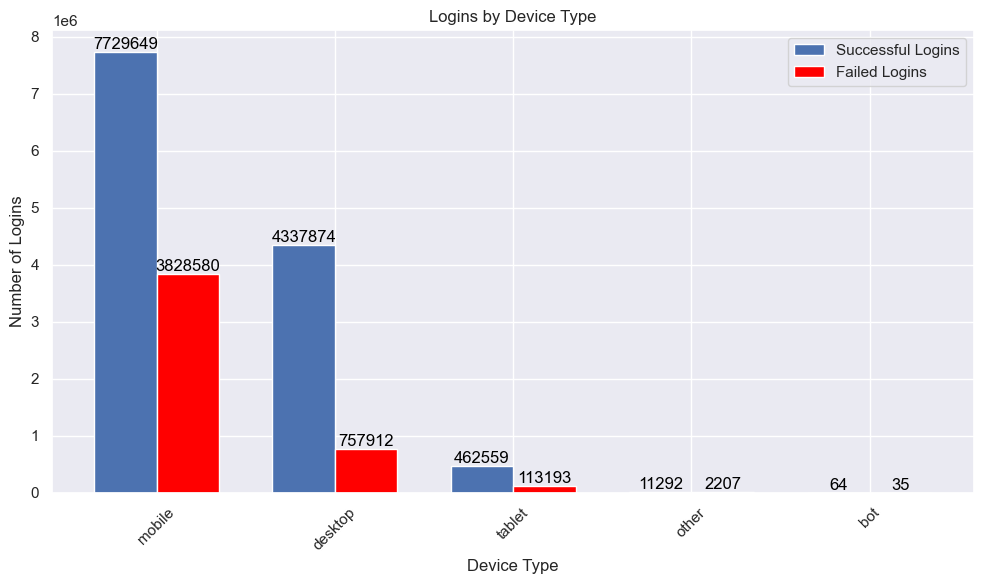

In [52]:


# Filter the DataFrame to include only the rows where 'Login Successful' is True
successful_logins = df[df['Login Successful']]
failed_logins = df[~df['Login Successful']]  # Rows where 'Login Successful' is False

# Count the number of True values for each device type
login_counts_success = successful_logins['Device Type'].value_counts()

# Count the number of False values for each device type
login_counts_failure = failed_logins['Device Type'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))

# Determine the x-axis locations for the bars
x = np.arange(len(login_counts_success))

# Set the width of each bar
bar_width = 0.35

# Plot the True values as blue bars
plt.bar(x, login_counts_success.values, width=bar_width, label='Successful Logins')

# Plot the False values as red bars
plt.bar(x + bar_width, login_counts_failure.values, width=bar_width, color='red', label='Failed Logins')

plt.xlabel('Device Type')
plt.ylabel('Number of Logins')
plt.title('Logins by Device Type')
plt.xticks(x + bar_width / 2, login_counts_success.index, rotation=45)
plt.legend()

# Add numbers on top of each bar
for i, v in enumerate(login_counts_success.values):
    plt.text(i, v + 1, str(v), ha='center', va='bottom', color='black')

for i, v in enumerate(login_counts_failure.values):
    plt.text(i + bar_width, v + 1, str(v), ha='center', va='bottom', color='black')

plt.tight_layout()
plt.show()


In [56]:
df.head()

,Login Timestamp,User ID,IP Address,Country,Device Type,Login Successful,Browser Category,LoginRatio
0,2020-02-03 12:43:55.873,-3284137479262433373,81.167.144.58,NO,mobile,True,Android,0.052632
1,2020-02-03 12:43:59.396,-4618854071942621186,10.0.0.47,US,mobile,False,Chrome Mobile WebView,2.000000
2,2020-02-03 12:44:07.893,7246533443898239661,80.202.228.214,NO,desktop,True,Chrome,1.000000
3,2020-02-03 12:44:12.799,-3243978724802435038,170.39.78.177,US,mobile,False,Chrome Mobile,1.500000
4,2020-02-03 12:44:17.474,8076000552587369902,10.0.61.212,NO,mobile,False,MiuiBrowser,0.007533


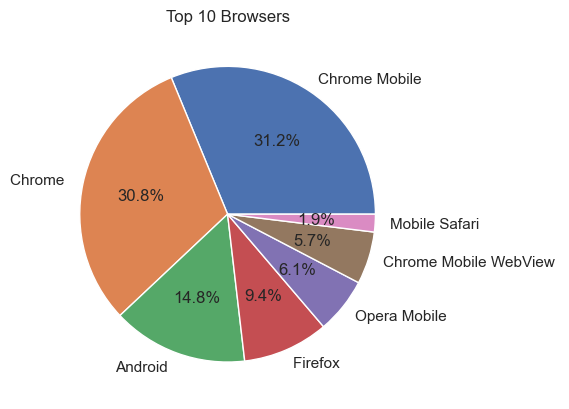

In [62]:
# Count the occurrences of each browser category
browser_counts = df['Browser Category'].value_counts().head(7)

# Create the pie chart
plt.pie(browser_counts.values, labels=browser_counts.index, autopct='%1.1f%%')
plt.title('Top 10 Browsers')

# Display the chart
plt.show()

In [91]:




# Get the top 20 countries by count
top_countries = df['Country'].value_counts().head(5).index.tolist()

# Filter the data for the top 20 countries
filtered_df = df[df['Country'].isin(top_countries)]

# Group by country and device type, then count the occurrences
device_counts_per_country = filtered_df.groupby(['Country', 'Device Type']).size()

# Print device counts per country for the top 20 countries
print("Device Counts per Country (Top 20 Countries):")
print(device_counts_per_country)


Device Counts per Country (Top 20 Countries):
Country  Device Type
BR       desktop         171876
         mobile          293543
         other              113
         tablet            9738
GB       desktop         166146
         mobile          107084
         other                5
         tablet            1116
NO       bot                 57
         desktop        4522081
         mobile         5715120
         other            10922
         tablet          530393
PL       desktop          38052
         mobile          459130
         other               12
         tablet            2076
US       desktop          33793
         mobile         4001733
         other              144
         tablet           13387
dtype: int64


### Calculating count of each column for each user -

#### The following code calculates the total number of different device types used by each user and adds the result as a new column called 'Total Devices Per User'.

In [31]:
# Calculating the total number of different device types used by each user
device_counts = df.groupby('User ID')['Device Type'].transform('nunique')

# Adding the column to the DataFrame
df['Total Devices Per User'] = device_counts

#### The following code calculates the total number of different IP addresses used by each user and adds the result as a new column called 'Total IP Addresses Per User'.

In [32]:
# Calculating the total number of different IP addresses used by each user
ip_counts = df.groupby('User ID')['IP Address'].transform('nunique')

# Adding the column to the DataFrame
df['Total IP Addresses Per User'] = ip_counts

#### The following code calculates the total number of different countries visited by each user and adds the result as a new column called 'Total Countries Per User'.

In [33]:
# Calculating the total number of different countries visited by each user
country_counts = df.groupby('User ID')['Country'].transform('nunique')

# Adding the column to the DataFrame
df['Total Countries Per User'] = country_counts

#### The code snippet you provided calculates the total number of different browser categories used. It then adds the result as a new column called 'Total Browser Categories Per User' to the DataFrame.

In [34]:
# Calculating the total number of different browser categories used by each user
browser_counts = df.groupby('User ID')['Browser Category'].transform('nunique')

# Add the 'Total Browser Categories' column to the DataFrame
df['Total Browser Categories Per User'] = browser_counts


In [35]:
df.head()

,Login Timestamp,User ID,IP Address,Country,Device Type,Login Successful,Browser Category,LoginRatio,Total Devices Per User,Total IP Addresses Per User,Total Countries Per User,Total Browser Categories Per User
0,2020-02-03 12:43:55.873,-3284137479262433373,81.167.144.58,NO,mobile,True,Android,0.052632,2,6,1,4
1,2020-02-03 12:43:59.396,-4618854071942621186,10.0.0.47,US,mobile,False,Chrome Mobile WebView,2.000000,1,1,1,1
2,2020-02-03 12:44:07.893,7246533443898239661,80.202.228.214,NO,desktop,True,Chrome,1.000000,2,3,1,2
3,2020-02-03 12:44:12.799,-3243978724802435038,170.39.78.177,US,mobile,False,Chrome Mobile,1.500000,1,2,1,1
4,2020-02-03 12:44:17.474,8076000552587369902,10.0.61.212,NO,mobile,False,MiuiBrowser,0.007533,2,221,1,4


In [36]:
df.shape

(17243365, 12)

### This code snippet performs several operations on the DataFrame. 

It first converts the 'Login Timestamp' column to datetime format. 

Then, it sorts the DataFrame by 'Login Timestamp' within each user, ensuring that the data is arranged in ascending order of login timestamps for each user. 

Next, it calculates the time difference between consecutive login attempts for each user by taking the difference of login timestamps within each user group. 

Finally, it fills any missing values (represented as NaT) in the 'Time Difference' column with 0 for users who have only one login attempt, using the fillna() function. 

Overall, the code provides insights into the time intervals between login attempts for each user in the DataFrame.

In [37]:
# Converting the 'Login Timestamp' column to datetime format
df['Login Timestamp'] = pd.to_datetime(df['Login Timestamp'])

# Sorting the data by 'Login Timestamp' within each user
df.sort_values(['User ID', 'Login Timestamp'], inplace=True)

# Calculating the login time difference until the next attempt for each user
df['Time Difference'] = df.groupby('User ID')['Login Timestamp'].diff()

# Replacing NaT values with 0 for users with only one attempt
df['Time Difference'] = df['Time Difference'].fillna(pd.Timedelta(seconds=0))

#### This operations ensure that the DataFrame is sorted based on the 'Login Timestamp' column.

In [38]:
df = df.sort_values('Login Timestamp')
df.head()

,Login Timestamp,User ID,IP Address,Country,Device Type,Login Successful,Browser Category,LoginRatio,Total Devices Per User,Total IP Addresses Per User,Total Countries Per User,Total Browser Categories Per User,Time Difference
0,2020-02-03 12:43:55.873,-3284137479262433373,81.167.144.58,NO,mobile,True,Android,0.052632,2,6,1,4,0 days
1,2020-02-03 12:43:59.396,-4618854071942621186,10.0.0.47,US,mobile,False,Chrome Mobile WebView,2.000000,1,1,1,1,0 days
2,2020-02-03 12:44:07.893,7246533443898239661,80.202.228.214,NO,desktop,True,Chrome,1.000000,2,3,1,2,0 days
3,2020-02-03 12:44:12.799,-3243978724802435038,170.39.78.177,US,mobile,False,Chrome Mobile,1.500000,1,2,1,1,0 days
4,2020-02-03 12:44:17.474,8076000552587369902,10.0.61.212,NO,mobile,False,MiuiBrowser,0.007533,2,221,1,4,0 days


#### This code takes a column named 'Time Difference' in the DataFrame df and converts its values from a time difference format (e.g., '00:05:30') to the equivalent number of seconds.

In [39]:
from datetime import timedelta

# Convert the 'Time Difference' column to seconds
df['Time Difference'] = pd.to_timedelta(df['Time Difference']).dt.total_seconds()
df.tail()

,Login Timestamp,User ID,IP Address,Country,Device Type,Login Successful,Browser Category,LoginRatio,Total Devices Per User,Total IP Addresses Per User,Total Countries Per User,Total Browser Categories Per User,Time Difference
17243360,2021-02-28 23:58:55.507,-6715186037473961364,84.209.201.201,NO,mobile,True,Chrome Mobile,0.0,1,2,1,2,1598294.217
17243361,2021-02-28 23:59:39.734,9213110755313420550,80.202.129.223,NO,mobile,True,Mobile Safari,1.0,2,1,1,2,9117392.994
17243362,2021-02-28 23:59:42.530,-8342802450073386905,109.203.26.146,NO,mobile,True,Chrome Mobile,0.1,2,7,1,2,394043.578
17243363,2021-02-28 23:59:46.955,-4850944994677833290,92.221.228.146,NO,mobile,True,Mobile Safari,0.0,2,6,1,3,2652.454
17243364,2021-02-28 23:59:58.756,-3863191272176615105,156.52.189.92,NO,desktop,True,Chrome,0.0,2,8,1,3,6233079.804


In [40]:
df.shape

(17243365, 13)

### The code snippet assigns the "target" column with values based on certain conditions. These conditions can be tailored to capture anomalies in the data based on specific features or characteristics that are considered abnormal or indicative of anomalous behavior.

In [41]:
# Initialize the "target" column with zeros
df['target'] = 0

# Check conditions for Total Countries
df.loc[df['Total Countries Per User'] > 2, 'target'] += 1

# Check conditions for Total Device Types
df.loc[df['Total Devices Per User'] > 3, 'target'] += 1

# Check conditions for Total IP Addresses
df.loc[df['Total IP Addresses Per User'] > 4, 'target'] += 1

# Check conditions for Total Browser Categories
df.loc[df['Total Browser Categories Per User'] > 3, 'target'] += 1

# Check conditions for Time Difference (Seconds)
df.loc[(df['Time Difference'] > 0) & (df['Time Difference'] < 5), 'target'] += 1

# Check conditions for Final Browser Category
df.loc[df['Browser Category'] == 'Bot', 'target'] += 2

# Check conditions for Device Type
df.loc[df['Device Type'] == 'bot', 'target'] += 2

# Check conditions for LoginRatio
df.loc[df['LoginRatio'] > 10, 'target'] += 1

In [42]:
df.head()

,Login Timestamp,User ID,IP Address,Country,Device Type,Login Successful,Browser Category,LoginRatio,Total Devices Per User,Total IP Addresses Per User,Total Countries Per User,Total Browser Categories Per User,Time Difference,target
0,2020-02-03 12:43:55.873,-3284137479262433373,81.167.144.58,NO,mobile,True,Android,0.052632,2,6,1,4,0.0,2
1,2020-02-03 12:43:59.396,-4618854071942621186,10.0.0.47,US,mobile,False,Chrome Mobile WebView,2.000000,1,1,1,1,0.0,0
2,2020-02-03 12:44:07.893,7246533443898239661,80.202.228.214,NO,desktop,True,Chrome,1.000000,2,3,1,2,0.0,0
3,2020-02-03 12:44:12.799,-3243978724802435038,170.39.78.177,US,mobile,False,Chrome Mobile,1.500000,1,2,1,1,0.0,0
4,2020-02-03 12:44:17.474,8076000552587369902,10.0.61.212,NO,mobile,False,MiuiBrowser,0.007533,2,221,1,4,0.0,2


### The provided code generates a bar plot using matplotlib to summarize the number of users per target. It groups a DataFrame by the 'target' column, counts the occurrences of 'User ID' within each group, and creates a bar plot with the number of users on the y-axis and the target categories on the x-axis. The resulting visualization provides an overview of the distribution of users across different target categories.

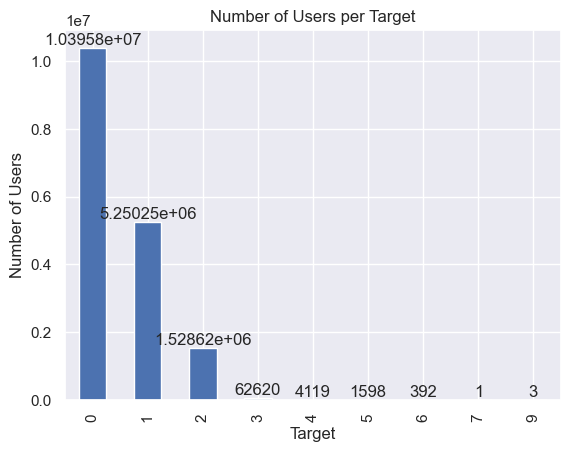

In [43]:
user_counts = df.groupby('target')['User ID'].count()

fig, ax = plt.subplots()
user_counts.plot(kind='bar', ax=ax)
ax.bar_label(ax.containers[0])

plt.xlabel('Target')
plt.ylabel('Number of Users')
plt.title('Number of Users per Target')
plt.show()

### The code calculates and displays the top IP addresses based on the number of unique users associated with each IP address in a DataFrame.

In [44]:
ip_user_counts = df.groupby('Total IP Addresses Per User')['User ID'].nunique()

# Sort the IP addresses by the number of unique users in descending order
top_ip_addresses = ip_user_counts.sort_values(ascending=False)

# Print the top IP addresses along with the number of unique users
top_ip_addresses.head(20) 

Total IP Addresses Per User
1     2395287
2      856455
3      412374
4      227283
5      136490
6       85726
7       56071
8       37407
9       25751
10      17617
11      12632
12       9192
13       6845
14       5224
15       3938
16       3042
17       2343
18       1764
19       1373
20       1095
Name: User ID, dtype: int64

### This code provides details such as the number of non-null values in each column, the data type of each column, and the total memory consumed by the DataFrame. This information helps to understand the structure and content of the DataFrame, including any missing values and potential data type issues.

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17243365 entries, 0 to 17243364
Data columns (total 14 columns):
 #   Column                             Dtype         
---  ------                             -----         
 0   Login Timestamp                    datetime64[ns]
 1   User ID                            int64         
 2   IP Address                         object        
 3   Country                            object        
 4   Device Type                        object        
 5   Login Successful                   bool          
 6   Browser Category                   object        
 7   LoginRatio                         float64       
 8   Total Devices Per User             int64         
 9   Total IP Addresses Per User        int64         
 10  Total Countries Per User           int64         
 11  Total Browser Categories Per User  int64         
 12  Time Difference                    float64       
 13  target                             int64         
dtype

### The following columns are being dropped since they contain unique values and are no longer needed for further analysis or processing

In [46]:
df = df.drop(['Login Timestamp', 'IP Address', "User ID"], axis= 1)

### This code segment performs label encoding on categorical columns and converts boolean columns to integers, making the data suitable for certain machine learning algorithms that require numeric inputs.

In [47]:
from sklearn.preprocessing import LabelEncoder

# Selecting the categorical columns to be label encoded
categorical_cols = ['Country', 'Device Type', 'Browser Category']

# Initializing the LabelEncoder
label_encoder = LabelEncoder()

# Applying label encoding to each categorical column
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

# Converting boolean columns to integers (0 or 1)
bool_cols = ['Login Successful']
df[bool_cols] = df[bool_cols].astype(int)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17243365 entries, 0 to 17243364
Data columns (total 11 columns):
 #   Column                             Dtype  
---  ------                             -----  
 0   Country                            int64  
 1   Device Type                        int64  
 2   Login Successful                   int64  
 3   Browser Category                   int64  
 4   LoginRatio                         float64
 5   Total Devices Per User             int64  
 6   Total IP Addresses Per User        int64  
 7   Total Countries Per User           int64  
 8   Total Browser Categories Per User  int64  
 9   Time Difference                    float64
 10  target                             int64  
dtypes: float64(2), int64(9)
memory usage: 1.5 GB


In [52]:
df.sample(5)

,Country,Device Type,Login Successful,Browser Category,LoginRatio,Total Devices Per User,Total IP Addresses Per User,Total Countries Per User,Total Browser Categories Per User,Time Difference,target
14701524,146,2,1,0,0.100000,3,8,1,4,4605528.965,2
7101989,157,1,1,2,0.333333,2,2,1,1,1022.743,0
7356394,146,2,1,0,0.000000,2,6,2,2,2984003.251,1
2798672,146,2,1,3,0.000000,1,4,1,1,0.000,0
3764547,146,2,1,17,0.000000,1,1,1,1,0.000,0


### This code snippet uses the train_test_split function from scikit-learn to split a dataset into training and testing sets. 

It assumes that the dataset is stored in the variable 'data'. The features are extracted from the DataFrame by dropping the 'target' column, which is assigned to the variable 'X'. The target variable is assigned to the variable 'y'. 

The dataset is then split into training and testing subsets using a 80:20 ratio, where 80% of the data is used for training and 20% for testing. 

The resulting splits are stored in 'X_train', 'X_test', 'y_train', and 'y_test', allowing for model training on the training data and evaluation on the testing data.

In [53]:
from sklearn.model_selection import train_test_split

X = df.drop('target', axis=1)  # Features
y = df['target']  # Target variable

# Spliting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [54]:
x_train_head = X_train.head()
x_train_head

,Country,Device Type,Login Successful,Browser Category,LoginRatio,Total Devices Per User,Total IP Addresses Per User,Total Countries Per User,Total Browser Categories Per User,Time Difference
8357573,202,2,1,21,0.666667,1,7,1,2,1981875.957
5098171,146,1,1,2,0.500000,2,9,1,2,85926.926
16989868,202,2,1,3,0.111111,1,3,1,1,76.601
13196207,202,2,0,3,2.000000,1,2,1,1,0.000
15952406,146,1,1,2,0.023256,2,3,1,2,2225565.818


### The following code creates and trains an XGBoost regression model using the XGBRegressor class from the xgboost library. It fits the model to the training data, allowing it to learn the patterns and relationships necessary for making predictions on unseen data.

In [55]:
from xgboost import XGBRegressor
regressor = XGBRegressor()
regressor.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

### The code snippet calculates evaluation metrics to assess the performance of a regression model trained using XGBoost. 

It uses the mean squared error (MSE), root mean squared error (RMSE), and mean absolute error (MAE) to measure the model's prediction accuracy. 

The code predicts the target variable for the test set using the trained XGBoost regressor, calculates the MSE, RMSE, and MAE by comparing the predicted values with the actual values, and then prints the results. 

These metrics provide insights into how well the regression model is performing in terms of the accuracy of its predictions.

In [56]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Making predictions using the trained regressor
y_pred = regressor.predict(X_test)

# Calculating mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

# Calculating root mean squared error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Calculating mean absolute error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)


Mean Squared Error (MSE): 0.0030612325056118346
Root Mean Squared Error (RMSE): 0.055328405955818345
Mean Absolute Error (MAE): 0.0066912955442211715


#### This code saves the trained XGBoost regressor model by serializing it with pickle and writing it to a file, enabling it to be easily loaded and utilized at a later time.

In [57]:
import pickle
filename = 'regressor_model.pkl'
with open(filename, 'wb') as file:
    pickle.dump(regressor, file)

#### The following code filters the data to retain only the rows where the 'target' value is greater than 4. It then obtains the indices of these filtered rows, providing a way to access or manipulate specific rows of interest within the DataFrame.

In [59]:
filtered_data = df[df['target'] > 4]

# Getting the indices of the filtered rows
indices = filtered_data.index
indices

Int64Index([   22600,    22606,    22621,    36813,    36823,   139096,
              157645,   224952,   226612,   230601,
            ...
            17187343, 17188110, 17200751, 17214346, 17214429, 17214472,
            17214524, 17214578, 17218785, 17231314],
           dtype='int64', length=1994)

In [61]:
index_to_print = 17218785
# Printing the row at the specified index
print(df.loc[index_to_print])

Country                               202.0
Device Type                             2.0
Login Successful                        0.0
Browser Category                        8.0
LoginRatio                           1155.0
Total Devices Per User                  4.0
Total IP Addresses Per User           674.0
Total Countries Per User               28.0
Total Browser Categories Per User      15.0
Time Difference                         0.0
target                                  5.0
Name: 22600, dtype: float64
